# Trabalhando com entradas de dados

Até agora temos usado `tf.Variables` para gerenciar nossos dados, mas há uma estrutura mais básica, o `tf.Placeholder(0`. O placeholder é simplesmente uma variável para a qual atribuiremos dados pertencentes a um conjunto de dados fornecido. Isso nos permite criar nossas operações e construir nosso grafo de computacional, sem precisar dos dados. Na terminologia TensorFlow alimentamos dados no grafo por meio desses placeholders. 

In [12]:
import tensorflow as tf
sess = tf.Session()

x = tf.placeholder(tf.float32, None)
y = tf.placeholder(tf.float32, None)
f = tf.pow(x, 2) * y + y + 2
#x² * y + y + 2
with tf.Session() as session:
    result = session.run(f, feed_dict={x: [1, 2, 3], y: [2, 3, 4]})
    print(result)

[ 6. 17. 42.]


* Criamos um objeto de sessão e, em seguida, executamos apenas o nó `f`. Observe que isso significa que, se definimos um grafo de operações muito maior, podemos executar apenas **um pequeno segmento do grafo**. Essa avaliação do subgrafo é, na verdade, um ponto de venda do TensorFlow, e um que não está presente em muitas outras bibliotecas que fazem coisas semelhantes.

* Avaliar `f` requer conhecimento sobre os valores de x e y. Nós definimos estes dentro do argumento `feed_dict` no método `run`. 

* Os placeholders não precisam ser estaticamente dimensionados. Porém é uma boa prática defini-los

## Dimensão dos placeholders

Placeholders também podem ter várias dimensões, permitindo o armazenamento de dados de alta dimensionaliadade. No exemplo a seguir, criamos uma matriz 3 por 2 e armazenamos alguns números nela. Em seguida, multiplicamos pela constante 2.

In [16]:
x = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6]]
    result = session.run(y, feed_dict={x: x_data})
    print(result)

[[ 2.  4.  6.]
 [ 8. 10. 12.]]


A primeira dimensão do Placeholder é `None`, o que significa que podemos ter qualquer número de linhas. A segunda dimensão é fixada em 3, o que significa que cada linha precisa ter três colunas de dados.

Podemos generalizar isso para obter um número arbitrário de dimensões. 

(3456, 4608, 3)
(2500, 4608, 3)


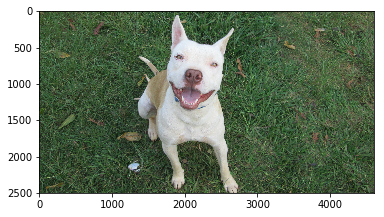

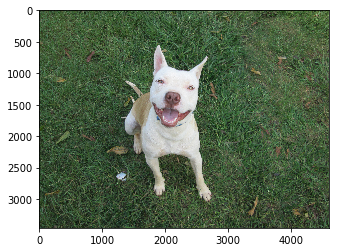

In [42]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

# First, load the image again
dir_path = os.path.dirname(os.path.realpath("__file__"))
filename = dir_path + "/../images/IMG_2135.JPG"
raw_image_data = mpimg.imread(filename)#concerte RGB

image = tf.placeholder(tf.uint8, [None, None, 3])
slice = tf.slice(image, [500, 0, 0], [2500, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(raw_image_data.shape)
    print(result.shape)

plt.imshow(result)
plt.show()
plt.imshow(raw_image_data)
plt.show()

Neste exemplo, carregamos a imagem e, em seguida, criamos um placeholder uma variável que armazena uma fatia dessa imagem. A fatia é um segmento 2D da imagem, mas cada “pixel” tem três componentes (vermelho, verde, azul). Portanto, precisamos definir as duas primeiras dimensões como none, mas precisamos deinir com o tamanho 3 para a última dimensão. Em seguida, usamos o método `tf.slice`.